### 逻辑回归模型
(1) Sigmoid 分布函数

    f(z) = 1/(1 + exp(-z))

(2) 逻辑回归模型： 
    
    h(x) = f(z) = 1/(1 +exp(- w.T *x))，其中 z = w.T * x


(3) 逻辑回归模型条件概率分布：

    P(Y = y | x) = h（x）if y == 1 
    P(Y = x | x) = 1 - h(x) if y ==0

(3) 对数似然函数

    P(y|x;w) = h(x) ** y + (1 - h(x)) ** (1 - y) 

    L(w) = Π（i）(P) i from 1 to n

(4) 对数损失函数

    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


Q：到逻辑回归为什么不用线性回归中的平方损失函数呢？

A: 这其实是有数学依据的。我们设置损失函数的目的是接下来通过最优化方法求得损失函数的最小值，损失最小即代表模型最优。在最优化求解中，只有 凸函数 往往才能求得全局最小值，非凸函数往往得到的是局部最优。然而，平方损失函数用于逻辑回归求解时得到的是非凸函数，即大多数情况下无法求得全局最优。这里使用了对数损失函数就避免了这个问题。

(5) 梯度下降法


Q:为什么叫逻辑回归？
「逻辑」二字是对逻辑分布的简称，也代表是与非，0 和 1 之间的逻辑，象征二分类问题。「回归」则源于线性回归，我们通过线性函数构建线性分类边界来达到分类的效果。



In [ ]:
# sigmoid 分布函数

def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

In [2]:
import pandas as pd

data = pd.read_csv("../../datasets/course-8-data.csv",header=0)
data.head()

X0   X1  Y
0  5.1  3.5  0
1  4.9  3.0  0
2  4.7  3.2  0
3  4.6  3.1  0
4  5.0  3.6  0

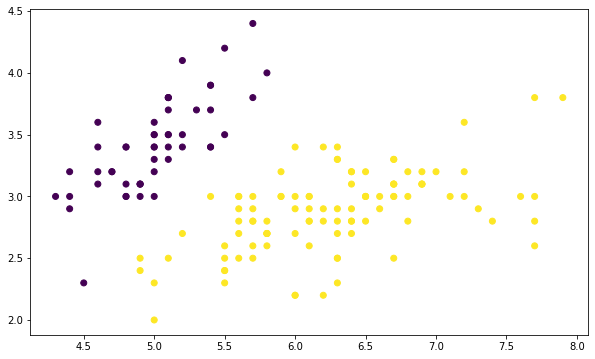

In [3]:
from matplotlib import pyplot as plt

df = data
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [4]:
import numpy as np 

def sigmoid(x):
    #sigmoid分布函数
    return 1/(1 + np.exp(-x))

def loss(h,y):
    #损失函数
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient(X,h,y):
    #梯度计算
    return np.dot(X.T,(h - y)) / y.shape[0]

def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.05103697443193301, array([-1.47673791,  4.27250311, -6.9234085 ]))

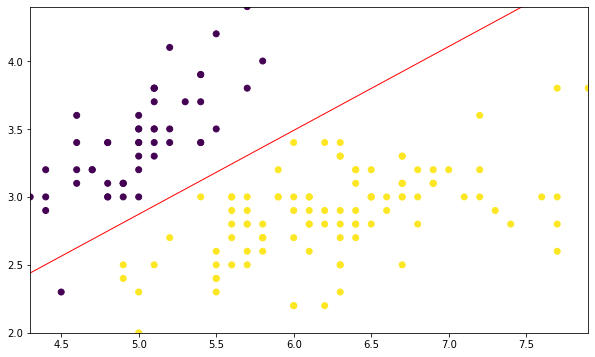

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

Text(0, 0.5, 'Loss function')

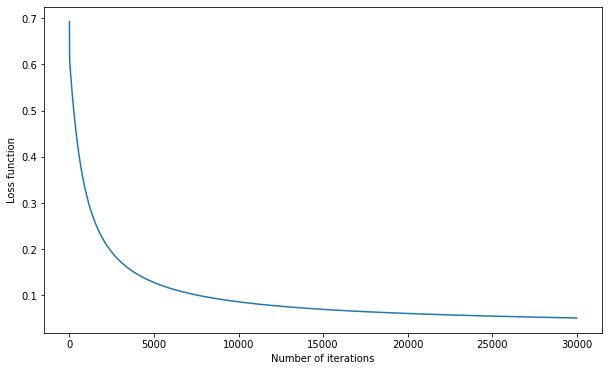

In [6]:
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

## 使用sklearn实现逻辑斯蒂回归
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

介绍其中几个常用的参数，其余使用默认即可：

    penalty: 惩罚项，默认为 L2 范数。

    dual: 对偶化，默认为 False。

    tol: 数据解算精度。

    fit_intercept: 默认为 True，计算截距项。

    random_state: 随机数发生器。

    max_iter: 最大迭代次数，默认为 100。

    另外，solver 参数用于指定求解损失函数的方法。默认为 liblinear（0.22 开始默认为 lbfgs），适合于小数据集。除此之外，还有适合多分类问题的 newton-cg, sag, saga 和 lbfgs 求解器。

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    tol=0.001, max_iter=10000, solver="liblinear"
)  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

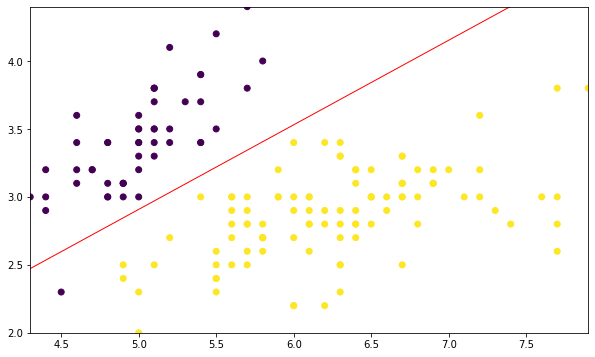

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")